## __1 - Business Problem__  
___1) Extract tweets for any user (try choosing a user who has more tweets)___  
___2) Perform sentimental analysis on the tweets extracted from the above___  

In [1]:
!python -m textblob.download_corpora


Finished.

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to

In [2]:
!pip install -U textblob

Requirement already up-to-date: textblob in c:\users\lenovo\anaconda3\lib\site-packages (0.17.1)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import re
import nltk
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud

## Basic on Textblob

In [4]:
my_sentence = TextBlob("I am reading a blog post on my post. I am loving it!")


In [5]:
my_sentence.tags

[('I', 'PRP'),
 ('am', 'VBP'),
 ('reading', 'VBG'),
 ('a', 'DT'),
 ('blog', 'NN'),
 ('post', 'NN'),
 ('on', 'IN'),
 ('my', 'PRP$'),
 ('post', 'NN'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('loving', 'VBG'),
 ('it', 'PRP')]

In [6]:
my_sentence.noun_phrases

WordList(['blog post'])

In [7]:
my_sentence.sentiment

Sentiment(polarity=0.75, subjectivity=0.95)

In [8]:
my_sentence.words


WordList(['I', 'am', 'reading', 'a', 'blog', 'post', 'on', 'my', 'post', 'I', 'am', 'loving', 'it'])

In [9]:
my_sentence.sentences


[Sentence("I am reading a blog post on my post."), Sentence("I am loving it!")]

In [10]:
my_sentence.words[4].pluralize() # the word "blog"


'blogs'

## Now to try on my own data set == Elon MUSK Tweets

In [11]:
tweets =pd.read_csv('Elon_musk.csv',engine="python",encoding='latin1',error_bad_lines=False)

<ipython-input-11-0dc82e42efe8>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets =pd.read_csv('Elon_musk.csv',engine="python",encoding='latin1',error_bad_lines=False)


In [12]:
tweets.head(5)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## EDA

In [13]:
# clean the text
def cleantext(text):
    text=re.sub(r'@[A-Za-z]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[/s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    
    return text

In [14]:
tweets['Text']= tweets['Text'].apply(cleantext)
tweets

,Unnamed: 0,Text
0,1,11 Im an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,27 Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...
...,...,...
1994,1995,"True, it sounds so surreal, but the negative ..."
1995,1996,Make sure to read ur terms &amp; conditions b...
1996,1997,Samwise Gamgee
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...


## Create a function to get the subjectivity

In [15]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


## create a function to getthe polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create a new column 
tweets['Subjectivity']= tweets['Text'].apply(getSubjectivity)
tweets['Polarity']=tweets['Text'].apply(getPolarity)

In [16]:
tweets

,Unnamed: 0,Text,Subjectivity,Polarity
0,1,11 Im an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,27 Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


## Plot the word cloud

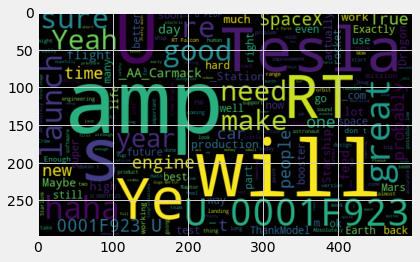

In [17]:
All_words = ' '.join([twts for twts in tweets['Text']])
wordcloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(All_words)
plt.imshow(wordcloud,interpolation='bilinear')

plt.show()

In [18]:
## Creating a function for compute the negative , neutral  and positive words
def getAnanlysis(score):
    
    if score <0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return'Positive'
tweets['Anaylsis']=tweets['Polarity'].apply(getAnanlysis)

In [19]:
tweets

,Unnamed: 0,Text,Subjectivity,Polarity,Anaylsis
0,1,11 Im an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,27 Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


## Printing all the positive tweets

In [20]:
j=1
sortedTweets =tweets.sort_values(by=['Polarity'])
for i in range (0,sortedTweets.shape[0]):
    print(str(j)+')' +sortedTweets['Text'][i])
    print()
    j=j+1

1)11 Im an alien

2)_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?

3)  Great interview!

4)27 Doge is underestimated

5) Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!

6)Happy New Year of the Ox! 

7)Frodo was the underdoge,
All thought he would fail,
Himself most of all. 

8)_  10 Haha thanks :)

9) 10 Indeed! Tweets definitely do not represent real-world time allocation.

10)The most entertaining outcome is the most likely

11) Just sent some

12)Just agree to do Clubhouse with 

13)

14)  Its getting real

15)Bought some Dogecoin for lil X, so he can be a toddler hodler

16) He definitely has issues, but the sentencing seems a bit high

17) Thanks for fixing

18) Please unlock my account

19) <U+0001F923><U+0001F923>

20)This is true power haha 

21) Any crypto wallet that wont give you your private keys should be avoided at all costs

22) Your app sucks

23)RT : NASA has selected Falcon Heavy to 

1233)Important note about Tesla Battery Day unveil tomorrow. This affects long-term production, especially Semi, Cybertr 

1234) Thanks!

1235)85   We really need better legs for Starship. Theyre coming.

1236)85   Most likely, all flaps will fold after landing to reduce wind tip over force. T 

1237)3Owners Fine, well do it already <U+0001F600>

1238)  Good analysis, although I think we should wait until FSD is a bit more mature

1239)__surfer Im pretty sure Tesla could do a much better autocorrect. The bar is so low haha.

1240)4 _Fot_Pik  _AA_Carmack True

1241)  _AA_Carmack Custom ultra high speed bus &amp; efficient cooling

1242) 305  _AA_Carmack Ok

1243)  _AA_Carmack Pretty much any machine-learning

1244)305  _AA_Carmack Its big

1245)_Fot_Pik  _AA_Carmack Sure

1246) _AA_Carmack Yeah, we will open Dojo for training as a web service once we work out the bugs

1247) _AA_Carmack There are a lot of pointless zeroes in FP32 neural nets. You can chop off 16 of the 3 

1248) 


1900) That is just one part of the surgery. For this to scale, it must be fully automated, like LASIK.

1901)This would solve a lot of brain/spine injuries &amp; is ultimately essential for AI symbiosis

1902) Fermi was awesome. He understood the right questions to ask.

1903)RT : 

1904)4ttwegner  <U+0001F923><U+0001F923>

1905)4ttwegner  BDE

1906)4ttwegner  How come Hulk never loses pants!?

1907) Yes

1908) No prior neuroscience background is required. This is primarily an electrical/electronic (chip design)/me 

1909)RT : Targeting Monday, July 20 for Falcon 9 launch of ANASIS-II from SLC-40

1910)Solving high-volume, high-reliability, low-cost production problems is especially valued

1911)If youve solved hard problems with phones / wearables (sealing, signal processing, inductive charging, power mgmt, 

1912) Many

1913) Summarizes pretty much every biz school case study

1914)Its inevitable 

1915) Excuse me, I only sell Doge!

1916)Will those who write the algorithms ever

## PRinting the all negative tweets


In [21]:
j=1
sortedTweets =tweets.sort_values(by=['Polarity'],ascending=False)
for i in range (0,sortedTweets.shape[0]):
    if(sortedTweets['Anaylsis'][i]=='Negative'):
        
        print(str(j)+')' +sortedTweets['Text'][i])
        print()
        j=j+1

1)11 Im an alien

2) Your app sucks

3) _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 

4) _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 

5) Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.

6) Doge appears to be inflationary, but is not meaningfully so (fixed  of coins per unit time), whereas 

7)  It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land

8) We were too dumb

9)This was a tough one 

10)RT : This mission enables access for everyday people who dream of going to space

11)_feed Earth is small &amp; we are smaller still 

12) _Ryan A little

13)@24_7TeslaNews  Yeah, probably in a few months

14) After you drive without using a PRND stalk/stick for a few days, it gets very annoying to go back &amp; use a shifter!

15) No more stalks. Car guesses drive direct

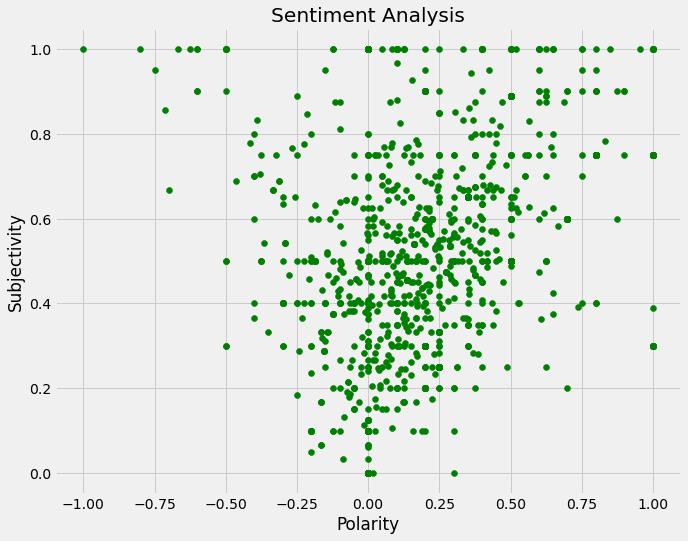

In [22]:
plt.figure(figsize=(10,8))
for i in range(0,tweets.shape[0]):
    plt.scatter(tweets['Polarity'][i],tweets['Subjectivity'][i],color='green')    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## try to get the percentage of postive tweets

In [23]:
ptweets = tweets[tweets.Anaylsis  =='Positive']
ptweets =ptweets['Text']



round((ptweets.shape[0]/tweets.shape[0])*100,1)



44.2

In [24]:
Ntweets = tweets[tweets.Anaylsis  =='Negative']
Ntweets =Ntweets['Text']



round((Ntweets.shape[0]/tweets.shape[0])*100,1)


11.0

In [25]:
Neutral_tweets = tweets[tweets.Anaylsis  =='Neutral']
Neutral_tweets =Neutral_tweets['Text']



round((Neutral_tweets.shape[0]/tweets.shape[0])*100,1)


44.8

In [41]:
print('All are in percentage %',
    '\nPostive tweets : ',round((ptweets.shape[0]/tweets.shape[0])*100,1),
    '\n Negative tweets:',round((Ntweets.shape[0]/tweets.shape[0])*100,1),
    '\n Neutral tweets:',round((Neutral_tweets.shape[0]/tweets.shape[0])*100,1)
)

All are in percentage % 
Postive tweets :  44.2 
 Negative tweets: 11.0 
 Neutral tweets: 44.8


## Sentiment Analysis 

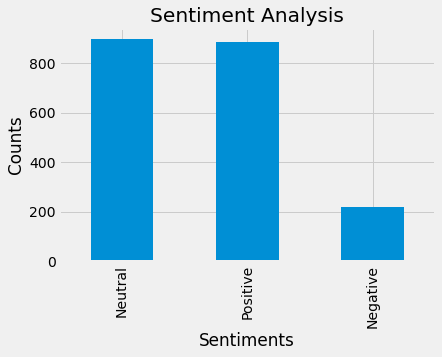

In [51]:
tweets['Anaylsis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
tweets['Anaylsis'].value_counts().plot(kind='bar')
plt.show()